In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import statsmodels

In [3]:
startups = pd.read_csv("./Data_for_exercises/50_Startups.csv")

In [4]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startups.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

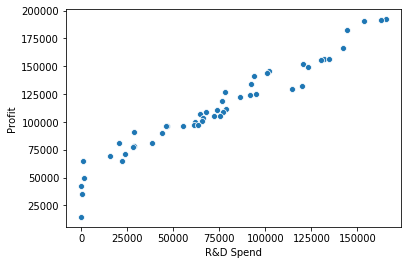

In [6]:
def draw_scatterplot_profit(x_axis):
    sns.scatterplot(x_axis, "Profit", data=startups)
draw_scatterplot_profit("R&D Spend")

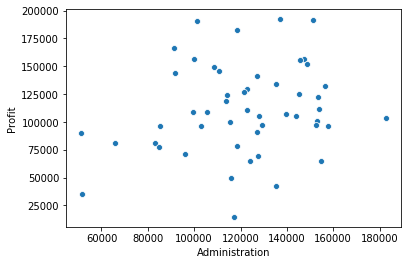

In [7]:
draw_scatterplot_profit("Administration")

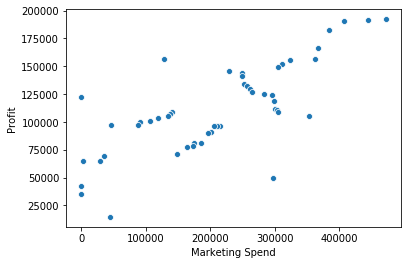

In [8]:
draw_scatterplot_profit("Marketing Spend")

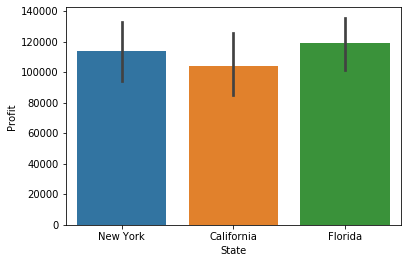

In [9]:
sns.barplot("State", "Profit", data=startups)

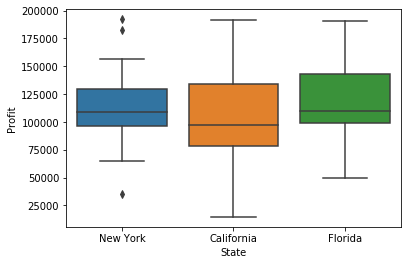

In [10]:
sns.boxplot("State", "Profit", data=startups)

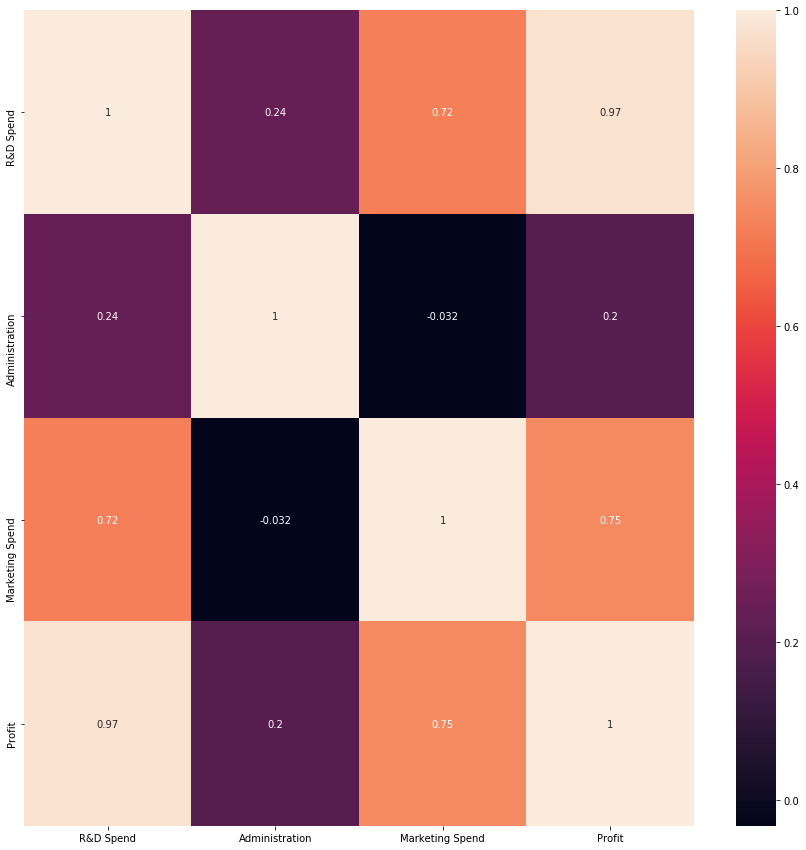

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(startups.corr(), annot = True)

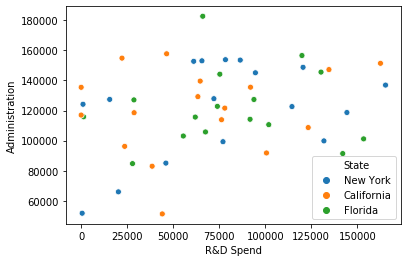

In [12]:
sns.scatterplot("R&D Spend", "Administration", hue="State", data= startups)

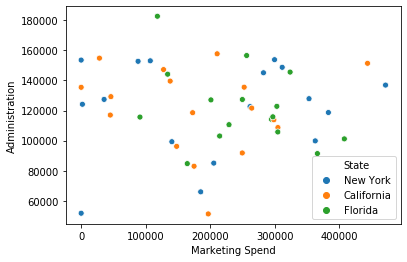

In [13]:
sns.scatterplot("Marketing Spend", "Administration", hue="State", data= startups)

In [14]:
social_ads = pd.read_csv("./Data_for_exercises/Social_Network_Ads.csv")

In [15]:
social_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


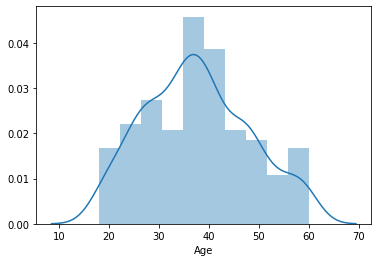

In [16]:
sns.distplot(social_ads.Age)

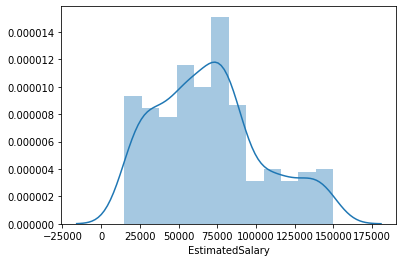

In [17]:
sns.distplot(social_ads.EstimatedSalary)

In [18]:
social_ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [19]:
social_ads["NormalizedSalary"] = (social_ads.EstimatedSalary - social_ads.EstimatedSalary.mean()) / social_ads.EstimatedSalary.std()

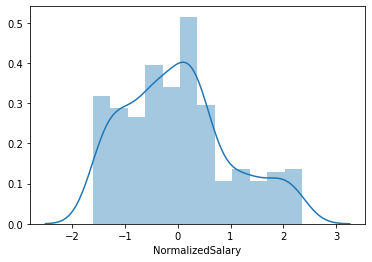

In [20]:
sns.distplot(social_ads.NormalizedSalary)

In [21]:
social_ads_purchased = social_ads[social_ads.Purchased == 1]
social_ads_purchased.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,NormalizedSalary
7,15694829,Female,32,150000,1,2.353802
16,15733883,Male,47,25000,1,-1.312214
17,15617482,Male,45,26000,1,-1.282886
18,15704583,Male,46,28000,1,-1.224229
19,15621083,Female,48,29000,1,-1.194901


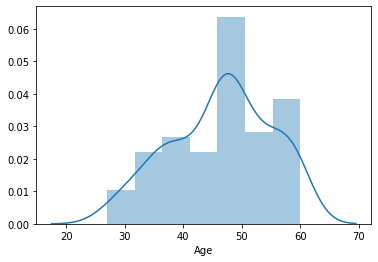

In [22]:
sns.distplot(social_ads_purchased.Age)

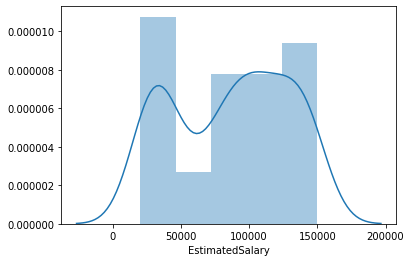

In [23]:
sns.distplot(social_ads_purchased.EstimatedSalary)

In [24]:
man_women_purchased = social_ads_purchased.groupby("Gender").sum()
man_women_ratio = man_women_purchased.Purchased / len(social_ads_purchased)
man_women_ratio

Gender
Female    0.538462
Male      0.461538
Name: Purchased, dtype: float64

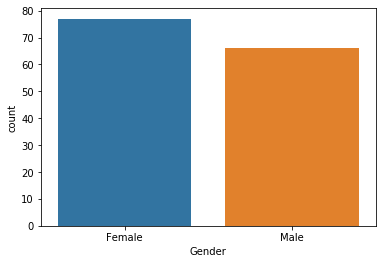

In [25]:
sns.countplot("Gender",  data = social_ads_purchased)

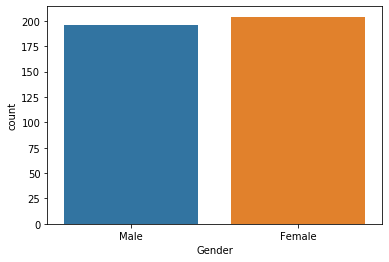

In [26]:
sns.countplot("Gender",  data = social_ads)

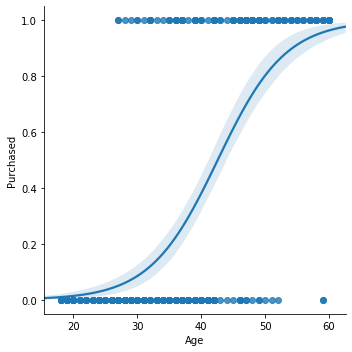

In [27]:
sns.lmplot("Age", "Purchased", data = social_ads, logistic = True)

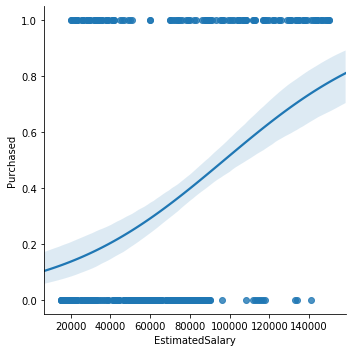

In [28]:
sns.lmplot("EstimatedSalary", "Purchased", data = social_ads, logistic = True)

In [31]:
airbnb_listings = pd.read_csv("./Data_for_exercises/listings.csv")
airbnb_reviews = pd.read_csv("./Data_for_exercises/reviews.csv")

In [32]:
airbnb_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [33]:
airbnb_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [56]:
airbnb = airbnb_listings.merge(airbnb_reviews, right_on="listing_id", left_on="id")

In [57]:
airbnb.head()

,id_x,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,f,2,4.07,241032,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


In [58]:
airbnb.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',

In [59]:
airbnb.price = airbnb.price.str.replace(',', '')
airbnb.price = airbnb.price.apply(lambda x: int(float(x[1:])))

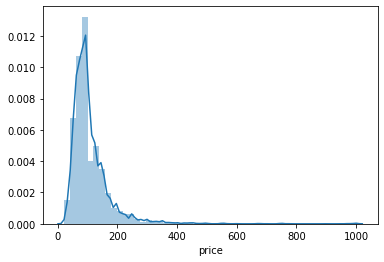

In [61]:
sns.distplot(airbnb.price)

In [62]:
airbnb.describe()

,id_x,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,listing_id,id_y,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84240.000000,84559.000000,...,84815.000000,84824.000000,84818.000000,84817.000000,0.0,84849.000000,84849.000000,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,2.016010e+13,9.304441e+06,4.135417,4.135417,47.626567,-122.333548,3.104433,1.167124,1.149399,...,9.865979,9.871381,9.600309,9.501515,NaN,2.274193,3.611434,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,0.000000e+00,1.019022e+07,14.177846,14.177846,0.042841,0.031280,1.742950,0.459605,0.703272,...,0.368220,0.359110,0.545284,0.567547,NaN,3.442128,2.188166,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,2.016010e+13,1.393266e+06,1.000000,1.000000,47.606799,-122.356266,2.000000,1.000000,1.000000,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,1.930000,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,2.016010e+13,5.486995e+06,1.000000,1.000000,47.621686,-122.329586,2.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,3.270000,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,2.016010e+13,1.395977e+07,3.000000,3.000000,47.661823,-122.311772,4.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,4.930000,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,2.016010e+13,5.076344e+07,502.000000,502.000000,47.733358,-122.254189,16.000000,8.000000,7.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,1.024814e+07,5.873651e+07,5.281274e+07


In [63]:
filtered_airbnb = airbnb[airbnb.price <= 400]

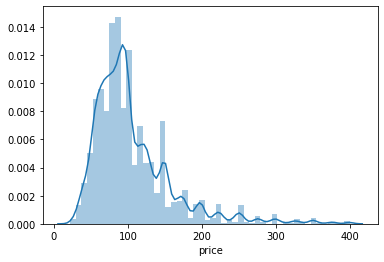

In [65]:
sns.distplot(filtered_airbnb.price)

In [77]:
ratio = len(filtered_airbnb.groupby("id_x").count()) / len(airbnb.groupby("id_x").count()) 

In [78]:
ratio

0.9833907865872767

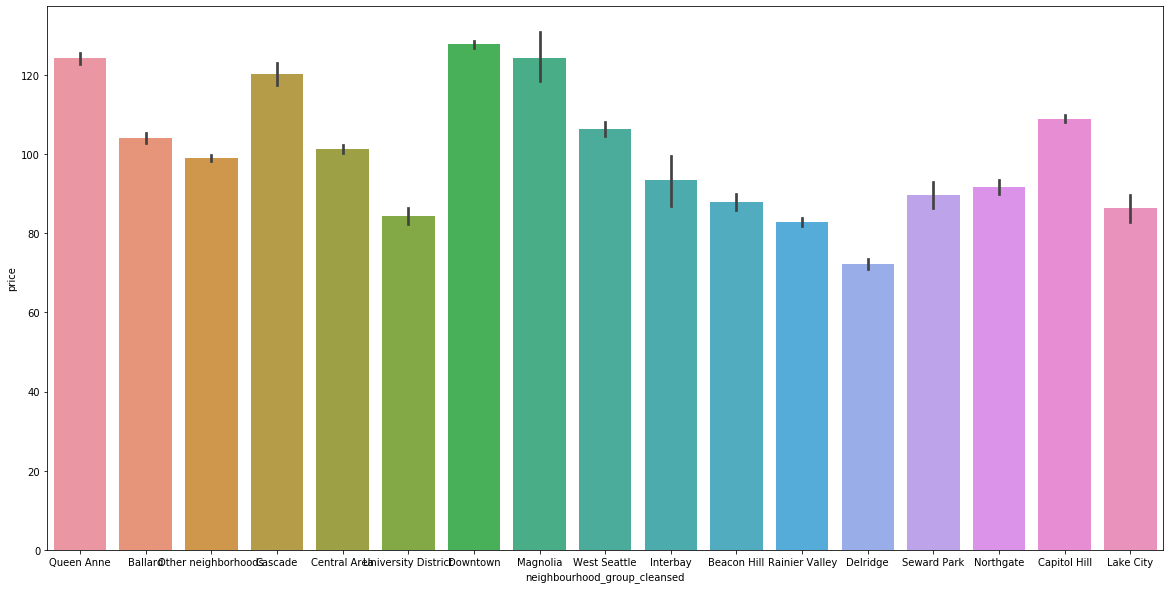

In [81]:
plt.figure(figsize = (20, 10))
sns.barplot("neighbourhood_group_cleansed", "price", data = filtered_airbnb)

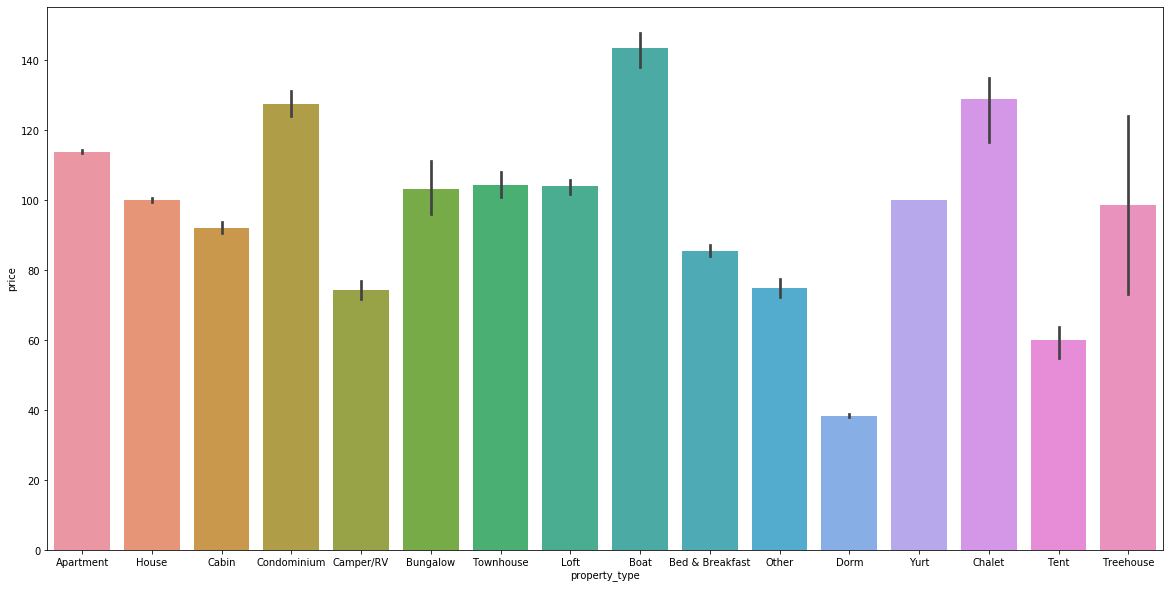

In [82]:
plt.figure(figsize = (20, 10))
sns.barplot("property_type", "price", data = filtered_airbnb)

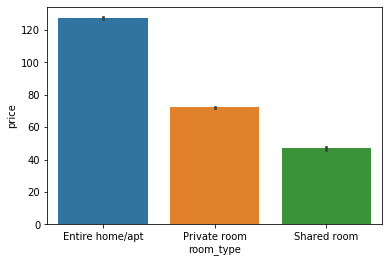

In [84]:
sns.barplot("room_type", "price", data = filtered_airbnb)

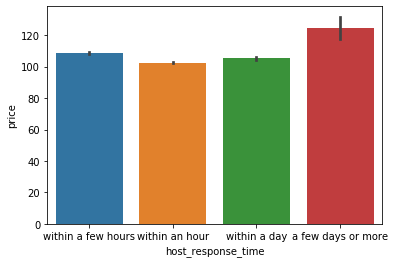

In [85]:
sns.barplot("host_response_time", "price", data = filtered_airbnb)

In [86]:
late_response_airbnb = filtered_airbnb[filtered_airbnb.host_response_time == "a few days or more"]

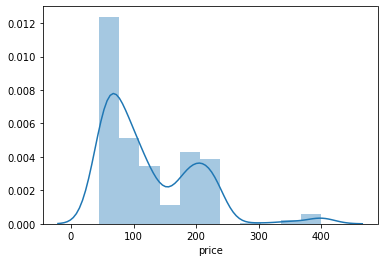

In [87]:
sns.distplot(late_response_airbnb.price)

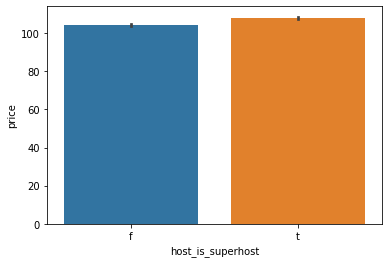

In [88]:
sns.barplot("host_is_superhost", "price", data = filtered_airbnb)

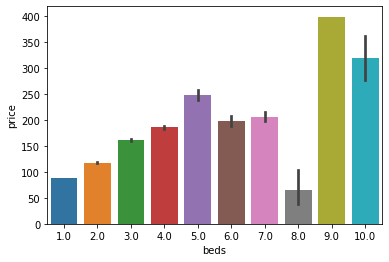

In [89]:
sns.barplot("beds", "price", data = filtered_airbnb)

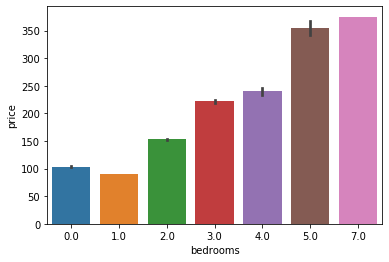

In [90]:
sns.barplot("bedrooms", "price", data = filtered_airbnb)

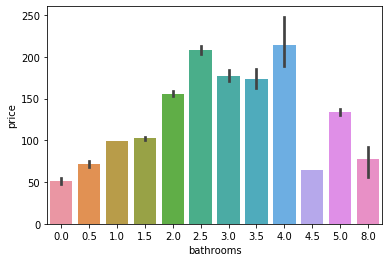

In [91]:
sns.barplot("bathrooms", "price", data = filtered_airbnb)

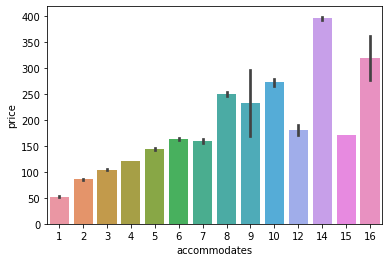

In [93]:
sns.barplot("accommodates", "price", data = filtered_airbnb)

In [94]:
filtered_airbnb.amenities

0        {TV,"Cable TV",Internet,"Wireless Internet","A...
1        {TV,"Cable TV",Internet,"Wireless Internet","A...
2        {TV,"Cable TV",Internet,"Wireless Internet","A...
3        {TV,"Cable TV",Internet,"Wireless Internet","A...
4        {TV,"Cable TV",Internet,"Wireless Internet","A...
5        {TV,"Cable TV",Internet,"Wireless Internet","A...
6        {TV,"Cable TV",Internet,"Wireless Internet","A...
7        {TV,"Cable TV",Internet,"Wireless Internet","A...
8        {TV,"Cable TV",Internet,"Wireless Internet","A...
9        {TV,"Cable TV",Internet,"Wireless Internet","A...
10       {TV,"Cable TV",Internet,"Wireless Internet","A...
11       {TV,"Cable TV",Internet,"Wireless Internet","A...
12       {TV,"Cable TV",Internet,"Wireless Internet","A...
13       {TV,"Cable TV",Internet,"Wireless Internet","A...
14       {TV,"Cable TV",Internet,"Wireless Internet","A...
15       {TV,"Cable TV",Internet,"Wireless Internet","A...
16       {TV,"Cable TV",Internet,"Wireless Internet","A.

In [100]:
filtered_amenities_count = filtered_airbnb.amenities.str.replace('{', '').str.replace('}', '').str.split(',')

In [102]:
filtered_airbnb["filtered_amenities_count"] = filtered_amenities_count

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
filtered_airbnb.filtered_amenities_count = filtered_airbnb.filtered_amenities_count.apply(lambda x: len(x))
filtered_airbnb.filtered_amenities_count

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0        10
1        10
2        10
3        10
4        10
5        10
6        10
7        10
8        10
9        10
10       10
11       10
12       10
13       10
14       10
15       10
16       10
17       10
18       10
19       10
20       10
21       10
22       10
23       10
24       10
25       10
26       10
27       10
28       10
29       10
         ..
84819    19
84820    19
84821    19
84822    19
84823    19
84824    19
84825    19
84826    19
84827    19
84828    19
84829    19
84830    19
84831    19
84832    19
84833    19
84834    19
84835    19
84836    19
84837    19
84838    19
84839    19
84840    19
84841    19
84842    19
84843    19
84844    19
84845    19
84846    16
84847    17
84848    17
Name: filtered_amenities_count, Length: 84276, dtype: int64

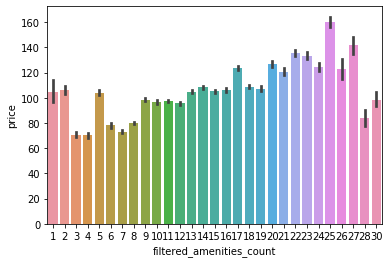

In [105]:
sns.barplot("filtered_amenities_count", "price", data = filtered_airbnb)

In [107]:
filtered_airbnb.review_scores_rating.isnull().any()

True

In [108]:
filtered_airbnb.review_scores_rating = filtered_airbnb.review_scores_rating.fillna(filtered_airbnb.review_scores_rating.mean())

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


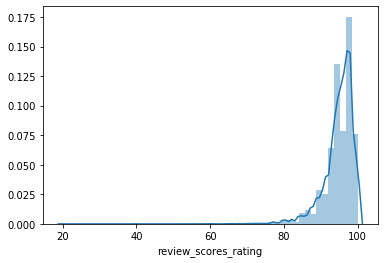

In [109]:
sns.distplot(filtered_airbnb.review_scores_rating)

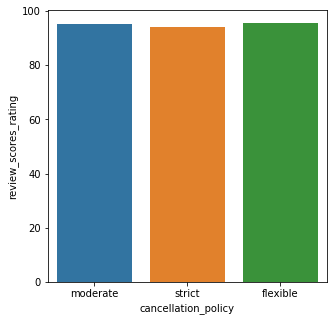

In [114]:
plt.figure(figsize = (5, 5))
sns.barplot("cancellation_policy", "review_scores_rating", data = airbnb)

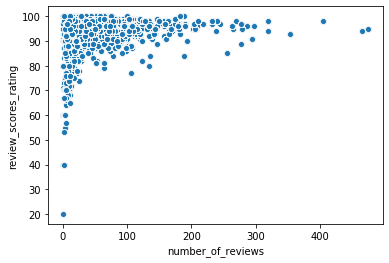

In [115]:
sns.scatterplot("number_of_reviews", "review_scores_rating", data = filtered_airbnb)

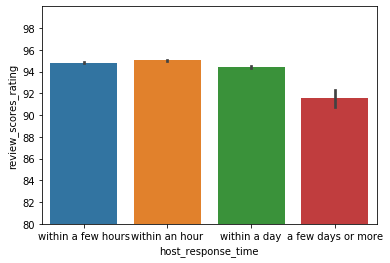

In [126]:
plt.ylim(ymin = 80, ymax = 100)
plt.yticks(range(80, 100, 2))
sns.barplot("host_response_time", "review_scores_rating", data = filtered_airbnb)